# EMG_Analysis
You have been provided with a data file in Blackboard named "<font color=red>**Toy_Dataset.csv**</font>". Please, use the dataset and try the perform the following operations



In [1]:
# Ernesto Hernandez-Hinojosa RJI284
#Import Libraries
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
# inline plotting in jupyter notebook
%matplotlib inline

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import all data files and save in dictionary called "d"

import glob, os
d={}
k=1
for infile in sorted(glob.glob('*.txt')):
    print ("Current File Being Processed is: " + infile)
    d["d{0}".format(k)]= np.genfromtxt(infile, skip_header = 1)
    
    k+=1


    

Current File Being Processed is: 01.txt
Current File Being Processed is: 02.txt
Current File Being Processed is: 03.txt
Current File Being Processed is: 04.txt
Current File Being Processed is: 05.txt
Current File Being Processed is: 06.txt
Current File Being Processed is: 07.txt
Current File Being Processed is: 08.txt
Current File Being Processed is: 09.txt
Current File Being Processed is: 10.txt
Current File Being Processed is: 11.txt
Current File Being Processed is: 12.txt
Current File Being Processed is: 13.txt
Current File Being Processed is: 14.txt
Current File Being Processed is: 15.txt
Current File Being Processed is: 16.txt
Current File Being Processed is: 17.txt
Current File Being Processed is: 18.txt
Current File Being Processed is: 19.txt
Current File Being Processed is: 20.txt
Current File Being Processed is: 21.txt
Current File Being Processed is: 22.txt
Current File Being Processed is: 23.txt
Current File Being Processed is: 24.txt
Current File Being Processed is: 25.txt


In [3]:
#Insert a column with an identifier number > 0 to differentiate between gesture changes

for j in range (1,73):
    
    Data=np.insert(d["d{0}".format(j)],10,0,axis=1)
    #print(np.size(Data,0))
    
    #print(Data)
    counter = 1
    ges = 0
    h=0
    for i in range(0,(np.size(Data,0))):
        if Data[i,9]==ges:
            ges=ges
            counter = counter
        else :
            ges = Data[i,9]
            counter+=1
        Data[i,10]=counter
        
        
    d["d{0}".format(j)]=Data
    #print(Data[i,:])
print(i)
print(j)
print(counter)
print(d["d{0}".format(j)])
print(Data[0,:])
    
    
    




49363
72
25
[[ 1.0000e+00 -1.0000e-05  0.0000e+00 ... -1.0000e-05  0.0000e+00
   1.0000e+00]
 [ 5.0000e+00 -1.0000e-05  0.0000e+00 ... -1.0000e-05  0.0000e+00
   1.0000e+00]
 [ 6.0000e+00 -1.0000e-05  0.0000e+00 ... -1.0000e-05  0.0000e+00
   1.0000e+00]
 ...
 [ 5.0964e+04  1.0000e-05 -1.0000e-05 ...  2.0000e-05  0.0000e+00
   2.5000e+01]
 [ 5.0965e+04  1.0000e-05 -1.0000e-05 ...  2.0000e-05  0.0000e+00
   2.5000e+01]
 [ 5.0966e+04  1.0000e-05 -1.0000e-05 ...  2.0000e-05  0.0000e+00
   2.5000e+01]]
[ 1.e+00 -1.e-05  0.e+00 -4.e-05 -4.e-05  2.e-05  1.e-05 -1.e-05 -1.e-05
  0.e+00  1.e+00]


In [116]:

G = 24; #gesture to be imported
ma=100; #set the moving average length
OL=2000
j=1
k=1
l=1

emgo=[]  #offset emg
emg= []  #mean corrected emg
emgm=[]   # mean corrected emg including ma values before #
time=[]
timem=[]
store=[]
ss=[]
xc=[]

for j in range (1,73):
    emgo.append([])
    emg.append([])
    emgm.append([])
    time.append([])
    timem.append([])
    store.append([])
    ss.append([])
    xc.append([])
    Data = d["d{0}".format(j)]
    mx = Data.max(axis=0)
    maxx=mx[10]
    maxx=maxx.astype(int)
    G=2;
    H=0
    
    for k in range (1,maxx):
        emgo[j-1].append([])
        emg[j-1].append([])
        emgm[j-1].append([])
        time[j-1].append([])
        timem[j-1].append([])
        store[j-1].append([])
        ss[j-1].append([])
        
    
        x1=Data[Data[:,10]==G] #import all columns in rows with G value in column 11 (10)
        store[j-1][k-1]=Data[Data[:,10]==G]
        tt=store[j-1][k-1]
        ss[j-1][k-1]=len(store[j-1][k-1])
        sss=ss[j-1][k-1]
        
        #-------------------------Split Data to Include half of the unlabeled data
        if(G==4):
            xc[j-1].append([])
            xc[j-1][H]=store[j-1][0]
            H+=1
        
        if (G%2==0)  & (G>3):
            xc[j-1][H-1]=np.vstack((xc[j-1][H-1],store[j-1][k-2][0:(round(ss[j-1][k-2]/2))]))
            xc[j-1].append([])
            xc[j-1][H]=np.vstack((store[j-1][k-2][(ss[j-1][k-2]-round(ss[j-1][k-2]/2)):ss[j-1][k-2]],store[j-1][k-1]))
            
            H+=1
            
      
        x1m1=Data[Data[:,10]==G-1] #import all columns in rows with G-1 value
       
        x1ma = np.vstack((x1m1[(-ma):-1],x1))  #add rows before x1 to account for moving average
        
        time1 = x1[:,0]
        
        time1ma = x1ma[:,0]
        time[j-1][k-1]=x1[:,0]
        timem[j-1][k-1]=x1ma[:,0]
        
        for l in range (1,8+1):  # Cycle through every channel
            emgo[j-1][k-1].append([])
            emg[j-1][k-1].append([])
            emgm[j-1][k-1].append([])
            d["x2{0}".format(j,k,l)]  = x1[:,l]
            x11 = x1[:,l]
            d["x2m{0}".format(j,k,l)]  = x1ma[:,l]
            x11ma=x1ma[:,l]
            d["emgc1{0}".format(j,k,l)]  = x11-np.mean(x11)
            d["emgc1m{0}".format(j,k,l)]  = x11ma-np.mean(x11ma)
            emgo[j-1][k-1][l-1] = x11
            emg[j-1][k-1][l-1]=x11-np.mean(x11)              #store the emg data starting from #2
            emgm[j-1][k-1][l-1]=x11ma-np.mean(x11ma)    # store moving average emg starting from #2-ma
           
        G+=1
   
    


In [117]:
print(maxx)

25


In [5]:
print(len(xc[71]))
print(xc[1][0][:,0])
#print(store[0][0][0:(round(sss/2))])

12
[ 880.  881.  882. ... 3807. 3808. 3809.]


In [139]:
#----------------Arrange Data by Channel Saved in the third level of the array
em=[]
tt=[]
for i in range (1,72):
    em.append([])
    tt.append([])
    maxx=len(xc[i-1])
    # process EMG signal: filter EMG
    for j in range (1, maxx+1):
        #print(j)
        em[i-1].append([])
        tt[i-1].append([])
        tt[i-1][j-1]=xc[i-1][j-1][:,0]
        
        
        for k in range (1,8+1):  # Cycle through every channel
            em[i-1][j-1].append([])
            em[i-1][j-1][k-1]=xc[i-1][j-1][:,k]
            
       
            
            

In [140]:
print(xc[71][0][:,0])
print(len(xc[0]))
print(len(tt[0]))
print(len(em[0]))

[1616. 1617. 1618. ... 4055. 4057. 4058.]
12
12
12


here
[-2.e-05  1.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05
  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05
  2.e-05]


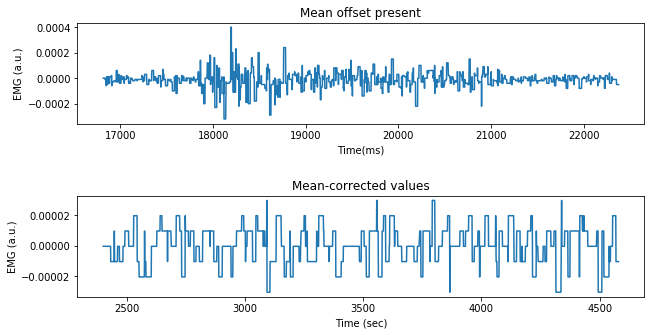

In [141]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Mean offset present')
plt.plot(tt[0][3], em[0][3][1])
plt.xlabel('Time(ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Mean-corrected values')
plt.plot(time[0][0], emg[0][0][0])
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig2.png'
fig.set_size_inches(w=10,h=5)

print('here')

print(x11[-20:-1])



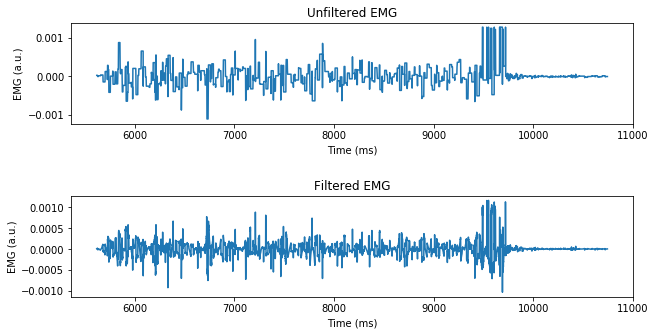

In [142]:
import scipy as sp
from scipy import signal

#create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2) #divide by two because this is the Nyquist frequency
# Design an Nth order Butterworth filter and return the filter coefficients (B,A) form. 
# 4th order Butterworth filters are quite common
b, a = sp.signal.butter(4, [high, low], btype='bandpass')
emg_filtered=[]
emg_filteredma=[]
em_filtered=[]
for i in range (1,72):
    Data = d["d{0}".format(i)]
    mx = Data.max(axis=0)
    #maxx=len(emg[i])
    maxx=mx[10]
    maxx=maxx.astype(int)
    maxx=len(xc[i-1])
    emg_filtered.append([])
    emg_filteredma.append([])
    em_filtered.append([])
    # process EMG signal: filter EMG
    for j in range (1, maxx+1):
        emg_filtered[i-1].append([])
        emg_filteredma[i-1].append([]) 
        em_filtered[i-1].append([])
        for k in range (1,8+1):
            
            emg_filtered[i-1][j-1].append([])
            emg_filteredma[i-1][j-1].append([]) 
            em_filtered[i-1][j-1].append([])
            
            ee=emg[i-1][j-1][k-1]
            eem=emgm[i-1][j-1][k-1]
            emm=em[i-1][j-1][k-1]
            emg_filtered[i-1][j-1][k-1] = sp.signal.filtfilt(b,a, ee)
            emg_filteredma[i-1][j-1][k-1] = sp.signal.filtfilt(b,a, eem)
            em_filtered[i-1][j-1][k-1]=sp.signal.filtfilt(b,a, emm)

# plot comparison of unfiltered vs filered mean-corrected EMG
fig = plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Unfiltered EMG')
plt.plot(tt[0][1], em[0][1][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Filtered EMG')
plt.plot(tt[0][1], em_filtered[0][1][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig3.png'
fig.set_size_inches(w=10,h=5)

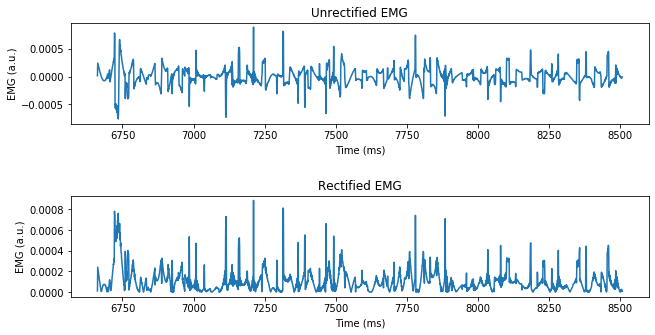

In [143]:
# process EMG signal: rectify

emg_rectified=[]
emg_rectifiedma=[]
em_rectified=[]
for i in range (1,72):
    Data = d["d{0}".format(i)]
    mx = Data.max(axis=0)
    #mx=np.amax(emg[i],axis=0)
    #maxx=len(emg[i])
    maxx=mx[10]
    maxx=maxx.astype(int)
    maxx=len(xc[i-1])
    emg_rectified.append([])
    emg_rectifiedma.append([])
    em_rectified.append([])
    # process EMG signal: filter EMG
    for j in range (1, maxx+1):
        emg_rectified[i-1].append([])
        emg_rectifiedma[i-1].append([]) 
        em_rectified[i-1].append([])
        for k in range (1,8+1):
            
            emg_rectified[i-1][j-1].append([])
            emg_rectifiedma[i-1][j-1].append([]) 
            em_rectified[i-1][j-1].append([])
            emg_rectified[i-1][j-1][k-1] = abs(emg_filtered[i-1][j-1][k-1])
            emg_rectifiedma[i-1][j-1][k-1] = abs(emg_filteredma[i-1][j-1][k-1])
            em_rectified[i-1][j-1][k-1]=abs(em_filtered[i-1][j-1][k-1])

# plot comparison of unrectfied vs rectified
fig = plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Unrectified EMG')
plt.plot(time[0][2], emg_filtered[0][2][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Rectified EMG')
plt.plot(time[0][2], emg_rectified[0][2][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig4.png'
fig.set_size_inches(w=10,h=5)



In [144]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


In [12]:
print(len(emg_rectifiedma[0][0][0]))
print(len(mavg[0][0][0]))
print(len(timem[0][0]))
print(len(time[0][0]))
print(len(emgm[0][0][0]))
print(len(emg_filteredma[0][0][0]))
print(len(emg_rectifiedma[0][0][0]))

2214


NameError: name 'mavg' is not defined

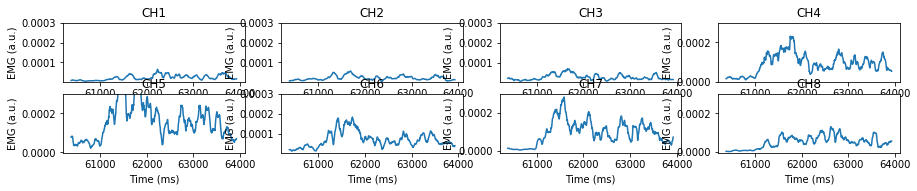

In [171]:


#ma_11 = np.append([a[0:ma-1]],[ma_11[:]])
mavg=[]
emavg=[]
tta=[]

for i in range (1,72):
    Data = d["d{0}".format(i)]
    mx = Data.max(axis=0)
    maxx=mx[10]
    maxx=maxx.astype(int)
    maxx=len(xc[i-1])
    mavg.append([])
    emavg.append([])
    tta.append([])
    for j in range (1, maxx+1):
        mavg[i-1].append([])
        emavg[i-1].append([])
        tta[i-1].append([])
        tta[i-1][j-1]=tt[i-1][j-1][ma-1:]
        
        for k in range (1,8+1):
            
            mavg[i-1][j-1].append([])
            emavg[i-1][j-1].append([])
            mavg[i-1][j-1][k-1] = moving_average(emg_rectifiedma[i-1][j-1][k-1], ma)
            emavg[i-1][j-1][k-1]=moving_average(em_rectified[i-1][j-1][k-1],ma)
            


"""

fig = plt.figure()
plt.plot(time[0][22], mavg[0][22][0])
fig.tight_layout()
fig_name = 'fig5.png'
fig.set_size_inches(w=10,h=5)"""

p=11  #Gesture change
q=3 #Subject

fig = plt.figure()
plt.subplot(4,4,1)
plt.subplot(4,4,1).set_title('CH1')
plt.plot(tta[q][p], emavg[q][p][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,2)
plt.subplot(4,4,2).set_title('CH2')
plt.plot(tta[q][p], emavg[q][p][1])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,3)
plt.subplot(4,4,3).set_title('CH3')
plt.plot(tta[q][p], emavg[q][p][2])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,4)
plt.subplot(4,4,4).set_title('CH4')
plt.plot(tta[q][p], emavg[q][p][3])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,5)
plt.subplot(4,4,5).set_title('CH5')
plt.plot(tta[q][p], emavg[q][p][4])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,6)
plt.subplot(4,4,6).set_title('CH6')
plt.plot(tta[q][p], emavg[q][p][5])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,7)
plt.subplot(4,4,7).set_title('CH7')
plt.plot(tta[q][p], emavg[q][p][6])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,8)
plt.subplot(4,4,8).set_title('CH8')
plt.plot(tta[q][p], emavg[q][p][7])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

#fig.tight_layout()
fig_name = 'fig5.png'
fig.set_size_inches(w=15,h=5)





In [156]:
print(len(emavg[1]))

12


In [157]:
#---------------------Normalize Data by Maximum Channel Value
em_norm=[]
ch_mx=[]  #store the maxvalue for each channel during each gesture (Calibration)

for i in range (1,72):
    Data = d["d{0}".format(i)]
    mx = Data.max(axis=0)
    maxx=mx[10]
    maxx=maxx.astype(int)
    maxx=len(xc[i-1])
    em_norm.append([])
    ch_mx.append([])
    
    for k in range (1,8+1):
            
            #em_norm[i-1].append([])
            ch_mx[i-1].append([])
            
            for j in range (1, maxx+1):
                
                #print('in')
          
                #em_norm[i-1][j-1].append([])
                ch_mx[i-1][k-1].append([])

                ch_mx[i-1][k-1][j-1]=np.amax(emavg[i-1][j-1][k-1])
                #em_norm[i-1][j-1][k-1]=np.divide(emavg[i-1][j-1][k-1],ch_mx[i-1][k-1][j-1])
                
    for j in range (1, maxx+1):
        em_norm[i-1].append([])



        for k in range (1,8+1):
            em_norm[i-1][j-1].append([])


            em_norm[i-1][j-1][k-1]=np.divide(emavg[i-1][j-1][k-1],np.amax(ch_mx[i-1][k-1]))
        
            

In [185]:
print(ch_mx[2][2])
print(np.amax(ch_mx[2][2]))
print(np.amax(emavg[2][0][2]))
print(maxx)
print(len(xc[18]))

[4.126464708347065e-05, 0.00024308490394956542, 0.00019960821483658048, 0.00014730429577819226, 0.00033240547526661597, 0.00016338920814949032, 0.00017732637069002368, 0.00013745535788979148, 8.082881641819265e-05, 0.00024597475325528696, 0.0002396900024315403, 0.00010197999926075264]
0.00033240547526661597
4.126464708347065e-05
12
12


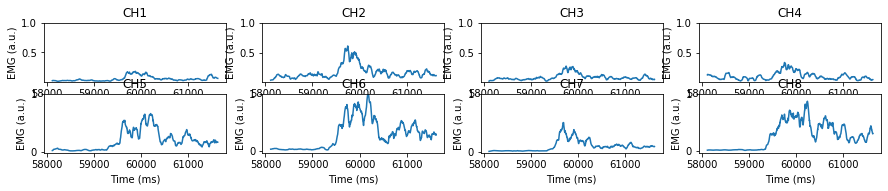

In [193]:
p=11  #Gesture change
q=18 #Subject

fig = plt.figure()
plt.subplot(4,4,1)
plt.subplot(4,4,1).set_title('CH1')
plt.plot(tta[q][p], em_norm[q][p][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

plt.subplot(4,4,2)
plt.subplot(4,4,2).set_title('CH2')
plt.plot(tta[q][p], em_norm[q][p][1])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

plt.subplot(4,4,3)
plt.subplot(4,4,3).set_title('CH3')
plt.plot(tta[q][p], em_norm[q][p][2])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

plt.subplot(4,4,4)
plt.subplot(4,4,4).set_title('CH4')
plt.plot(tta[q][p], em_norm[q][p][3])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

plt.subplot(4,4,5)
plt.subplot(4,4,5).set_title('CH5')
plt.plot(tta[q][p], em_norm[q][p][4])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

plt.subplot(4,4,6)
plt.subplot(4,4,6).set_title('CH6')
plt.plot(tta[q][p], em_norm[q][p][5])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

plt.subplot(4,4,7)
plt.subplot(4,4,7).set_title('CH7')
plt.plot(tta[q][p], em_norm[q][p][6])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

plt.subplot(4,4,8)
plt.subplot(4,4,8).set_title('CH8')
plt.plot(tta[q][p], em_norm[q][p][7])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=1.0)

#fig.tight_layout()
fig_name = 'fig5.png'
fig.set_size_inches(w=15,h=5)


In [16]:
#------------------------------------Create Array With Max Peak
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths

mx_peak=[]

for i in range (1,72):
    mx_peak.append([])
    for j in range (1,maxx-1):
        mx_peak[i-1].append([])
        for k in range (1,8+1):
            mx_peak[i-1][j-1].append([])
            mx_peak[i-1][j-1][k-1]=np.amax(em_norm[i-1][j-1][k-1])

In [96]:
print(mx_peak[0][2][1])

1.0


In [18]:
#------------------------------Create Array with Mean Value
mean=[]

for i in range (1,72):
    mean.append([])
    for j in range (1,maxx-1):
        mean[i-1].append([])
        for k in range (1,8+1):
            mean[i-1][j-1].append([])
            mean[i-1][j-1][k-1]=np.mean(em_norm[i-1][j-1][k-1])
            

In [19]:
print(mean[0][1][0])

0.2337347951571394


In [58]:
#----------------------------Create Two Arrays peak_val stores the max peak that meets heights and width criteria per channel
#--------------------------- peak_time stores the time at which this peak occurs
peaks=[]
peak_val=[]
peak_time=[]
max_ch=[]
peak_ra=[]
peak_timear=[]
time_ch=[]

for i in range (1,72):
    peaks.append([])
    peak_val.append([])
    peak_time.append([])
    max_ch.append([])
    peak_ra.append([])
    peak_timear.append([])
    time_ch.append([])
    #peakval=0
    for j in range (1,maxx-1):
        peaks[i-1].append([])
        peak_val[i-1].append([])
        peak_time[i-1].append([])
        max_ch[i-1].append([])
        peak_ra[i-1].append([])
        peak_timear[i-1].append([])
        time_ch[i-1].append([])
        mxch=0
        peakk=0
       
        
        for k in range (1,8+1):
            val=0
            peaks[i-1][j-1].append([])
            peak_val[i-1][j-1].append([])
            peak_time[i-1][j-1].append([])
            peak_ra[i-1][j-1].append([])
            peak_timear[i-1][j-1].append([])
            #max_ch[i-1][j-1].append([])
            peaks[i-1][j-1][k-1],_=find_peaks(em_norm[i-1][j-1][k-1], height=[0.2,1], width = 20)
            for l in range (0,len(peaks[i-1][j-1][k-1])-1):
                #print(l)
                #peak_val[i-1][j-1][k-1].append([])
                #peak_val[i-1][j-1][k-1][l]=em_norm[i-1][j-1][k-1][peaks[i-1][j-1][k-1][l]]
                peakval=em_norm[i-1][j-1][k-1][peaks[i-1][j-1][k-1][l]]
                
                if peakval > val:
                    peak_val[i-1][j-1][k-1]=peakval           #THE VALUE OF THE MAX PEAK MEETING CRITERIA PER CH
                    peakk=peakval;
                    peak_time[i-1][j-1][k-1]=tta[i-1][j-1][peaks[i-1][j-1][k-1][l]]  #THE TIME WHERE MAX PEAK OCCURS
                    peak_timear[i-1][j-1][k-1]=peaks[i-1][j-1][k-1][l]
                    val=peakval
                
            #if peakval > mxch:
            if peakk > mxch:
                #max_ch[i-1][j-1]=peak_val[i-1][j-1][k-1]  #Stores the MAX of all Channels
                max_ch[i-1][j-1]=peakk
                time_ch[i-1][j-1]=peak_timear[i-1][j-1][k-1]
                #mxch=peakval
                mxch=peakk
   
                    

In [59]:
#-----------------------peak_ra stores ratio of (value @ time of max peak in channel)/ (value of max peak in channel)
peak_ra=[]
for i in range (1,72):
    peak_ra.append([])
    
    for j in range (1,maxx-1):
        peak_ra[i-1].append([])
        
        for k in range (1,8+1):
            peak_ra[i-1][j-1].append([])
            peak_ra[i-1][j-1][k-1]=np.divide(em_norm[i-1][j-1][k-1][time_ch[i-1][j-1]],max_ch[i-1][j-1])
        
        
    
    



In [62]:
print(peaks[0][2][1])
print(peak_val[0][2][1])
print(peak_time[0][2][1])
print(em_norm[0][2][0][time_ch[0][2]])
print(max_ch[0][2])
print(peak_ra[0][2][0])
print(peakval)

[1358 1497 1563 1717 2269 2574 2904 3325 3558 3913 4502 4821]
1.0
12243.0
0.7147385907434348
1.0
0.7147385907434348
0.22144661860169573


In [92]:
#--------------------------med[] stores the median in each channel
#-------------------------med_norm[] stores the median in each channel normalized by the mean of the medians
med=[]
for i in range (1,72):
    med.append([])
    
    for j in range (1,maxx-1):
        med[i-1].append([])
        
        for k in range (1,8+1):
            med[i-1][j-1].append([])
            med[i-1][j-1][k-1]=np.median(em_norm[i-1][j-1][k-1])
med_norm=[]           
for i in range (1,72):
    med_norm.append([])
    
    for j in range (1,maxx-1):
        med_norm[i-1].append([])
        
        for k in range (1,8+1):
            med_norm[i-1][j-1].append([])
            med_norm[i-1][j-1][k-1]=np.divide(med[i-1][j-1][k-1],sum(med[i-1][j-1])/len(med[i-1][j-1]))

        


In [94]:
print(med[0][2][7])
print(sum(med[0][2])/len(med[0][2]))
print(med_norm[0][2][7])

0.12946893431188358
0.08042057801535138
1.6098980821447146


In [179]:
#--------------------------area[] stores the area under the curve in each channel
#-------------------------area_norm[] stores the area under the curve in each channel normalized by the mean of the areas
area=[]
for i in range (1,72):
    area.append([])
    
    for j in range (1,maxx-1):
        area[i-1].append([])
        
        for k in range (1,8+1):
            area[i-1][j-1].append([])
            area[i-1][j-1][k-1]=np.trapz(em_norm[i-1][j-1][k-1])
area_norm=[]           
for i in range (1,72):
    area_norm.append([])
    
    for j in range (1,maxx-1):
        area_norm[i-1].append([])
        
        for k in range (1,8+1):
            area_norm[i-1][j-1].append([])
            area_norm[i-1][j-1][k-1]=np.divide(area[i-1][j-1][k-1],sum(area[i-1][j-1])/len(area[i-1][j-1]))


In [180]:
print(area_norm[7][2])

[1.2344493630396096, 1.8231269859573525, 1.7347417255959907, 0.47092355555583143, 0.7637230800487685, 0.6933496741607582, 0.4425826897365205, 0.8371029259051681]


In [35]:
AA=[1,2,3,4]
print(len(AA))

4


In [77]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths

peak_widths(em_norm[0][2][1],[5])
peaks[i-1][j-1][k-1],properties=find_peaks(em_norm[i-1][j-1][k-1], height=[0.2,1], width = 20)
print(properties["widths"])
print(properties["left_ips"])
print(properties["right_ips"])

[179.57776792 100.19867446]
[1503.58376349 1967.48149057]
[1683.16153141 2067.68016503]


In [221]:
#Hjorth Parameters using rectified parameters, better values with normalized and ma parameters 

#Signal Activity (variance)
emg_var = [] 
for i in range(1,72):
    emg_var.append([])
    for j in range(1,maxx-1):
        emg_var[i-1].append([])
        for k in range(1,9):
            emg_var[i-1][j-1].append([])
            emg_var[i-1][j-1][k-1] = np.var(emg_rectified[i-1][j-1][k-1])  #testing with rectified vs normalized params 

            
#Signal MObility  and complexity 
emg_mob = []
emg_mob2 = [] 
emg_slope = [] 
emg_slope2 = [] 
emg_complexity = [] 

#time_mob = [] 
#time_slope = [] 

for i in range(1,72):
    emg_mob.append([])
    emg_mob2.append([])
    emg_slope.append([])
    emg_slope2.append([])
    emg_complexity.append([])
    
    #time_mob.append([])
    #time_slope.append([])
    for j in range(1,maxx-1):
        emg_mob[i-1].append([])
        emg_mob2[i-1].append([])
        emg_slope[i-1].append([])
        emg_slope2[i-1].append([])
        emg_complexity[i-1].append([])   
        #time_mob[i-1].append([])
        #time_slope[i-1].append([])
        for k in range(1,9):
            emg_slope[i-1][j-1].append([])
            emg_slope2[i-1][j-1].append([])
            emg_mob[i-1][j-1].append([])
            emg_mob2[i-1][j-1].append([])
            emg_complexity[i-1][j-1].append([])
            emg_slope[i-1][j-1][k-1] = np.diff(em_norm[i-1][j-1][k-1]) / np.diff(tta[i-1][j-1]) #1st derivative 
            emg_slope2[i-1][j-1][k-1] = np.diff(emg_slope[i-1][j-1][k-1]) / np.diff(tta[i-1][j-1][:-1]) #2nd derivative
            #mobility 
            emg_mob[i-1][j-1][k-1] = np.sqrt(np.var(emg_slope[i-1][j-1][k-1]) /emg_var[i-1][j-1][k-1])
            emg_mob2[i-1][j-1][k-1] = np.sqrt(np.var(emg_slope2[i-1][j-1][k-1])/emg_var[i-1][j-1][k-1])
            emg_complexity[i-1][j-1][k-1] = emg_mob2[i-1][j-1][k-1] / emg_mob[i-1][j-1][k-1]
            
ema=[]
eca=[]
for i in range (1,72):
    ema.append([])
    eca.append([])
    
    for j in range (1,maxx-1):
        ema[i-1].append([])
        eca[i-1].append([])
        
        
        
        for k in range (1,8+1):
            ema[i-1][j-1].append([])
            eca[i-1][j-1].append([])
            ema[i-1][j-1][k-1]=np.mean(emg_mob[i-1][j-1][k-1])
            eca[i-1][j-1][k-1]=np.mean(emg_complexity[i-1][j-1][k-1])

            
        


#Signal Complexity


            

In [69]:
hi=[]

for i in range (1,72):
    hi.append([])
    for j in range (1,maxx-1):
        hi[i-1].append([])
        
        for k in range (1,8+1):
            hi[i-1][j-1].append([])
            hi[i-1][j-1][k-1]=find_peaks(em_norm[i-1][j-1][k-1], height=[0.5,1], width = 20)

In [218]:
print(len(emg_slope2[0][0][0]))
print(len(tta[0][0]))
print(np.shape(tta[0][0]))
print(np.diff(tta[0][0]))

3025
3027
(3027,)
[1. 1. 1. ... 1. 1. 1.]


In [ ]:
#----------------------THIS IS WHERE I AM CURRENTLY AT

0.00012717923214836045
[ 172  284  672  877 1117 1271 1438 1710]
8
0.00027665057898307587


array([112, 388, 205, 240, 154, 167, 272], dtype=int64)

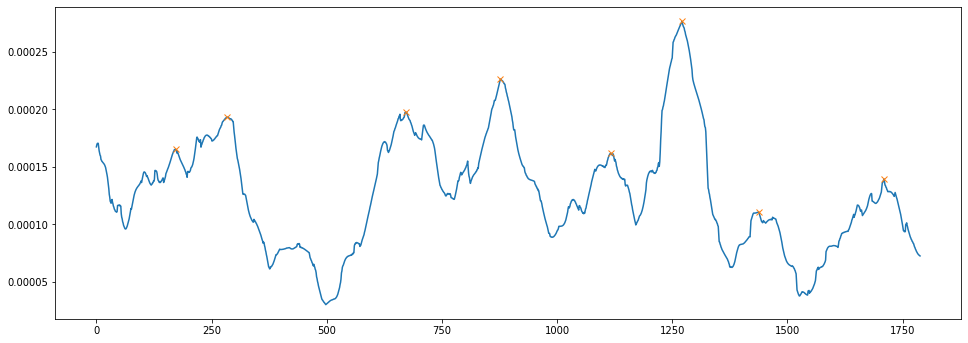

In [240]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths

mx_peak=[]

for i in range (1:72):
    mx_peaks.append([])
    for j in range (1:maxx):
        mx_peaks[i-1].append([])
        for k in range (1:8+1):
            mx_peaks[i-1][j-1].append([])
            mx_peak[i-1][j-1][k-1]=np.amax(em_norm[i-1][j-1][k-1])
            
            
            

peaks_ma,properties =find_peaks(ma_11, height=[0.0001,0.0006], width = 20)

fig = plt.figure()
plt.plot(ma_11)
plt.plot(peaks_ma, ma_11[peaks_ma], "x")
fig.tight_layout()
fig_name = 'fig6.png'
fig.set_size_inches(w=15,h=5)

mean_ma11 = np.average(ma_11)
print(mean_ma11)
print(peaks_ma)

num_peaks = np.size(peaks_ma)
print(num_peaks)

max_peak = properties["peak_heights"].max()
print(max_peak)

#spcing 
peak_dist = np.ediff1d(peaks_ma)

peak_dist


In [166]:
#Find peak width 
results_half = peak_widths(ma_11, peaks_ma, rel_height=0.0001)
results_half[0] #widths 
results_full = peak_widths(ma_11, peaks_ma, rel_height=0.0005)
results_full[0] #widths 


array([0.00197469, 0.00113662, 0.00094187, 0.00297422, 0.00095799,
       0.00056369, 0.01069307, 0.00050396, 0.19036921, 0.00070568,
       0.00060705, 0.00063023])

In [167]:
results_half[0]

array([0.00039494, 0.00022732, 0.00018837, 0.00059484, 0.0001916 ,
       0.00011274, 0.00213861, 0.00010079, 0.03807384, 0.00014114,
       0.00012141, 0.00012605])

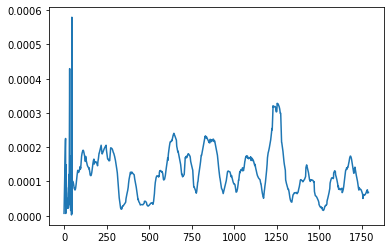

In [160]:
plt.plot(ma_11)
#plt.plot(peaks_ma, ma_11[peaks_ma], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()